In [2]:
import pandas as pd
housing = pd.read_csv('../data/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


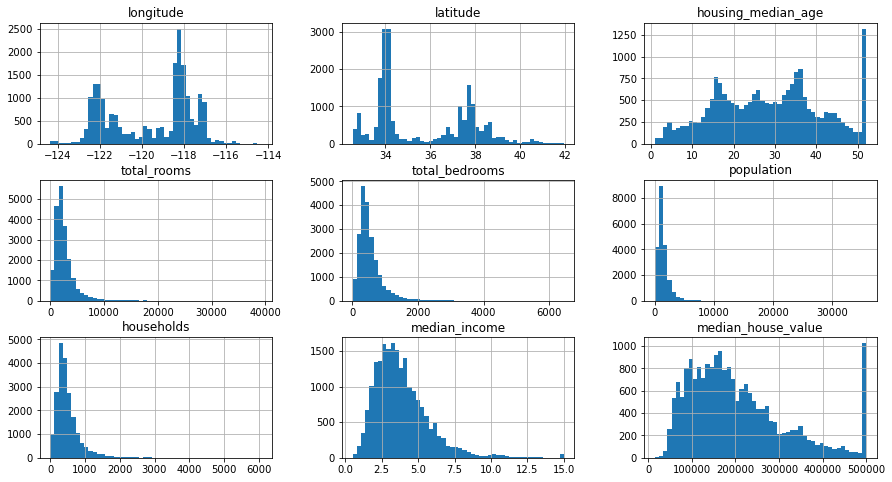

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize = (15,8))
plt.show()

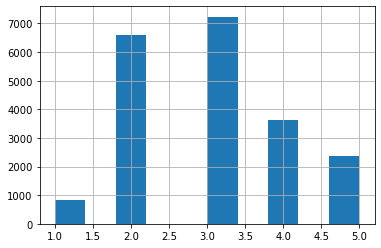

In [7]:
import numpy as np
import matplotlib.pyplot as plt

housing['income_cat'] = pd.cut(housing['median_income'],
                              bins=[0.,1.5,3.0,4.5,6,np.inf],
                              labels=[1,2,3,4,5])
housing['income_cat'].hist()
plt.show()

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state=42)

for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    

In [9]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [10]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

# EDA

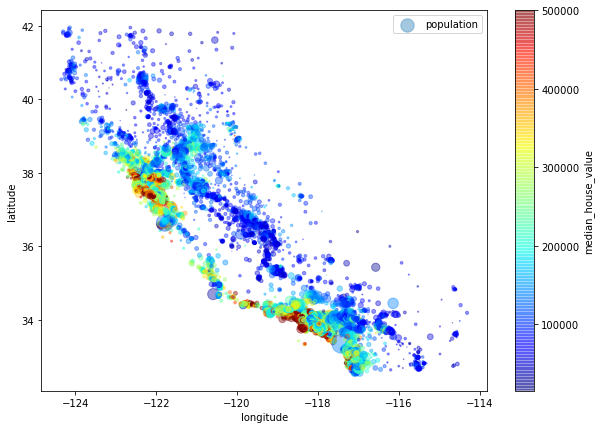

In [11]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,
            s=housing['population']/100,label='population',figsize=(10,7),
            c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True,
            sharex=False)

plt.show()

In [12]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

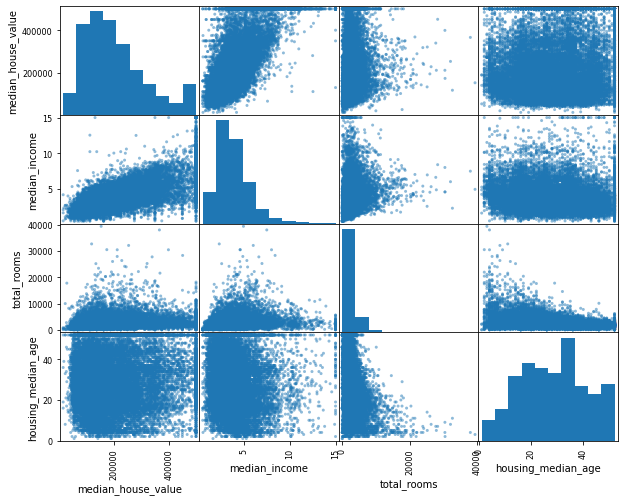

In [13]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income', 'total_rooms',
             'housing_median_age']
scatter_matrix(housing[attributes],figsize=(10,8))
plt.show()

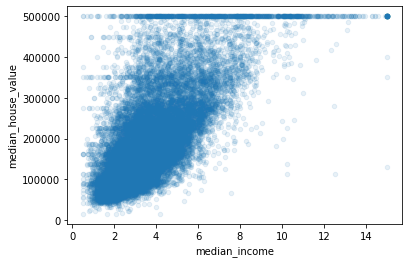

In [14]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',
            alpha=0.1)
plt.show()

In [15]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [16]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

# FE

In [17]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [18]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [19]:
housing_num = housing.drop('ocean_proximity',axis=1)

In [20]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [21]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [22]:
X=imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                         index=housing_num.index)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [23]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat = housing[['ocean_proximity']]
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [24]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [25]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [26]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

# 나만의 변환기

In [27]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:,population_ix] / X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

# 스케일링 파이프라인

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    
    ('imputer',SimpleImputer(strategy='median')),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [29]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num',num_pipeline,num_attribs),
    ('cat',OneHotEncoder(),cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [30]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

# 모델링

### 선형회귀

In [33]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [34]:
from sklearn.metrics import mean_squared_error
housing_pred = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

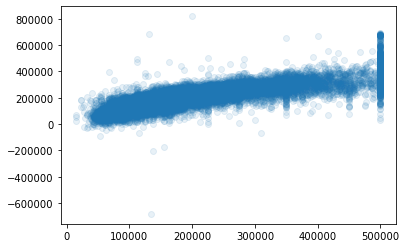

In [35]:
plt.scatter(housing_labels,housing_pred,alpha=0.1)
plt.show()

### 의사결정나무

In [36]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

housing_pred = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels,housing_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

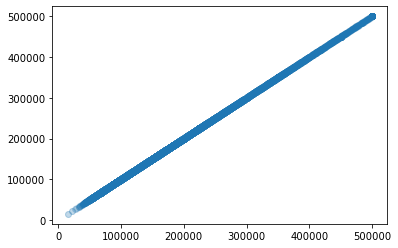

In [37]:
plt.scatter(housing_labels,housing_pred,alpha=0.1)
plt.show()

In [38]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print('점수:',scores)
    print('평균:',scores.mean())
    print('표준편차:',scores.std())

display_scores(tree_rmse_scores)

점수: [68269.18762762 66193.94517817 71382.98959096 69065.73993309
 70985.53316274 75420.41496907 70964.03091359 70810.29568994
 77171.8507462  70171.42336778]
평균: 71043.54111791434
표준편차: 3045.987919619016


### 랜덤포레스트

In [39]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)

scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                        scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores = np.sqrt(-scores)

display_scores(forest_rmse_scores)


점수: [49677.31756264 47555.36226301 49923.1647051  52127.44420259
 49559.39510133 53514.73210045 49174.48142934 47868.53370498
 52931.21080921 50503.1481702 ]
평균: 50283.4790048854
표준편차: 1908.5584989004485


In [40]:
forest_mse = mean_squared_error(housing_labels,housing_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.0

In [41]:
import joblib

joblib.dump(forest_reg, 'my_model.pkl')


['my_model.pkl']

## 모델 세부 튜닝

In [42]:
forest_reg = joblib.load('my_model.pkl')

### 그리드 탐색 

In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}
             ]
forest_reg= RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [46]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [49]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),params)

64287.892023412074 {'max_features': 2, 'n_estimators': 3}
55200.61620739029 {'max_features': 2, 'n_estimators': 10}
53012.87978447058 {'max_features': 2, 'n_estimators': 30}
59690.877972126706 {'max_features': 4, 'n_estimators': 3}
52897.677488701935 {'max_features': 4, 'n_estimators': 10}
50563.837579211024 {'max_features': 4, 'n_estimators': 30}
58776.28416278548 {'max_features': 6, 'n_estimators': 3}
52496.30402376182 {'max_features': 6, 'n_estimators': 10}
50091.85390418699 {'max_features': 6, 'n_estimators': 30}
57962.406778073855 {'max_features': 8, 'n_estimators': 3}
52303.957687435315 {'max_features': 8, 'n_estimators': 10}
50252.647318637486 {'max_features': 8, 'n_estimators': 30}
63673.657780242946 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54660.04202927787 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59510.4126491629 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52751.826408008696 {'bootstrap': False, 'max_features': 3, 'n_estimat

### Feature_importances

In [51]:
feature_importances = grid_search.best_estimator_.feature_importances_
extra_attribs = ['rooms_per_hhold','pop_per_hhold','bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs=list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances,attributes),reverse=True)

[(0.3239185089669101, 'median_income'),
 (0.15259596244703058, 'INLAND'),
 (0.10863266985591592, 'pop_per_hhold'),
 (0.07658822140154052, 'bedrooms_per_room'),
 (0.0726759745533975, 'longitude'),
 (0.0696008630562588, 'latitude'),
 (0.06616994440843935, 'rooms_per_hhold'),
 (0.042880190251535936, 'housing_median_age'),
 (0.017849737901615623, 'total_rooms'),
 (0.017621713125392464, 'population'),
 (0.016822748119922504, 'total_bedrooms'),
 (0.016474088194660036, 'households'),
 (0.00985023786309801, '<1H OCEAN'),
 (0.004424693160536597, 'NEAR BAY'),
 (0.0038295862724820316, 'NEAR OCEAN'),
 (6.486042126396585e-05, 'ISLAND')]

### Test

In [53]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value',axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

48236.23381738664


In [54]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) **2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                        loc = squared_errors.mean(),
                        scale = stats.sem(squared_errors)))


array([46211.53294998, 50179.30577622])